<a href="https://colab.research.google.com/github/amalmon/RETAIL-SALES-PREDICTION/blob/main/AMAL_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##### libraries

In [2]:
import pandas as pd
import numpy as np
from pandas import datetime as dt
from pandas import Series,DataFrame
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


#####taking data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
rossmann_store_data= pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
store_data=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /store.csv')

In [6]:
rossmann_df=rossmann_store_data.copy()

In [7]:
store_df=store_data.copy()

#####basic analysis on data

In [8]:
rossmann_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
rossmann_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [13]:
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


#####**for duplicate row**

In [14]:
len(rossmann_df[rossmann_df.duplicated()])

0

In [15]:
len(store_df[store_df.duplicated()])

0

In [16]:
rossmann_df.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [17]:
rossmann_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

#####**For null values**

In [18]:
rossmann_df.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [19]:
store_df.isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [20]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## **Remove features with high percentages of missing values**
we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [21]:
#remove features
store_df=store_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1)

### **Replace missing values in features with low percentages of missing values**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of store competition distance')

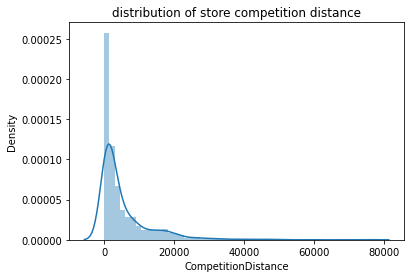

In [24]:
# CompetitionDistance is distance in meters to the nearest competitor store
# have a look at its distribution
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("distribution of store competition distance")

The distribution is right skewed, so we'll replace missing values with the median.

In [22]:
# replace missing values in CompetitionDistance with median for the store dataset
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(),inplace=True)

# **Date Extraction**

In [25]:
# extract year, month, day and week of year from "Date"
rossmann_df['year']=rossmann_df.index.year
rossmann_df['month']=rossmann_df.index.month
rossmann_df['day'] =rossmann_df.index.day
rossmann_df['weekofyear']=rossmann_df.index.weekofyear
train=rossmann_df.reset_index()

AttributeError: ignored

**. Here we can understand that null values of competition since month & year is due to missing data why because they have fare values under competition distance.**

**. so, It doesn't mean that there is no competition**

In [ ]:
store_df.loc[store_df['CompetitionDistance'].isnull()]

#####**. Here we can assume that these 3 stores have no competitors**

So, we can replace NaN values of copetition distance column with maximum value of competition distance available in data
And also we can replace NaN values of column competition since month and year with mode values of the respective columns

In [ ]:
store_df['CompetitionDistance'].max()

In [ ]:
store_df['CompetitionDistance'].min()

In [ ]:
store_df['CompetitionDistance'].mean()

In [ ]:
store_df['CompetitionDistance'].median()

*here may be no competetors at all for the shopes with null values of competition distance bt based on that when we applying maximum values there is a increase in outliers in column value. so, we choose mean.
and also it will not make significant changes in dataset

##### manipulations

In [ ]:
#1## null vales of column CompetitionDistance replaced by mean value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

In [ ]:
#checking
store_df.loc[290]
# understanding values of CompetitionOpenSinceMonth
store_df.CompetitionOpenSinceMonth.value_counts()

9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [ ]:
#taking mode value of CompetitionOpenSinceMonth
store_df.CompetitionOpenSinceMonth.mode()[0]

9.0

In [ ]:
#2## replacing null values of CompetitionOpenSinceMonth column with its mode value
store_df['CompetitionOpenSinceMonth'].fillna(store_df.CompetitionOpenSinceMonth.mode()[0], inplace = True)

In [ ]:
#3## replacing null values of CompetitionOpenSinceYear with mode value
store_df['CompetitionOpenSinceYear'].fillna(store_df.CompetitionOpenSinceYear.mode()[0], inplace = True)

In [ ]:
#checking the changes happen
store_df.info()
#understanding promo2 column values and its counts
store_df.Promo2.value_counts()
#for mode value of Promo2SinceWeek
store_df.Promo2SinceWeek.mode()
#understanding Promo2SinceWeek column values and its counts
store_df.Promo2SinceWeek.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


14.0    81
40.0    77
31.0    44
10.0    42
5.0     39
1.0     35
37.0    35
13.0    34
45.0    34
22.0    33
18.0    29
35.0    25
9.0     14
27.0    11
36.0    10
48.0     9
39.0     6
23.0     5
44.0     3
6.0      1
26.0     1
50.0     1
49.0     1
28.0     1
Name: Promo2SinceWeek, dtype: int64

In [ ]:
store_df.loc[store_df['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,9.0,2013.0,0,NaN,NaN,NaN


**.Here we can conform that the stores which do not participate in promo2 they do not have 
any values in promo2 since yr & month and also promo2 interval**

**. so we can replace the NaN values of promo2 since [yr& month] and promo 2 interval with value 'zero'**

In [ ]:
''' imparting zero value to the null values
in columns promo2 since [yr& month] and promo 2 interval in the rows which contain zero value in promo2 column'''

' imparting zero value to the null values\nin columns promo2 since [yr& month] and promo 2 interval in the rows which contain zero value in promo2 column'

In [ ]:
store_df.shape[0]

1115

* null values of  promo2 since [yr& month] and promo 2 interval can be also directly make it as 'zero' 

In [ ]:
#4## replacing null values of column Promo2SinceYear & PromoInterval with zero
store_df['Promo2SinceWeek'].fillna(0,inplace=True)
store_df['Promo2SinceYear'].fillna(0,inplace=True)
store_df['PromoInterval'].fillna(0,inplace=True)


In [ ]:
#df=df.mask(df==0).fillna(df.mean())

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#5##
store_df['CompetitionOpenSinceYear']=store_df['CompetitionOpenSinceYear'].astype(int)
store_df['CompetitionOpenSinceMonth']=store_df['CompetitionOpenSinceMonth'].astype(int)

In [ ]:
store_df.CompetitionOpenSinceMonth.value_counts()

9     479
4      94
11     92
3      70
7      67
12     64
10     61
6      50
5      44
2      41
8      39
1      14
Name: CompetitionOpenSinceMonth, dtype: int64

#####**feature engineering**

######competition since

In [ ]:
#6# making new column by combining competition since month and year (date assumed to be 15)
store_df['competition_since'] =pd.to_datetime(store_df['CompetitionOpenSinceYear'].astype(str)+'-'+store_df['CompetitionOpenSinceMonth'].astype(str))

In [ ]:
#7
del store_df['CompetitionOpenSinceMonth']
#8
del store_df['CompetitionOpenSinceYear']

In [ ]:
#9 merging 2 datasets on store number

final_df = rossmann_df.merge(store_df,how='inner',on = ['Store'])

In [ ]:
#10  converting object typ of column 'date' to date time for subtract with 'competition since'
final_df['Date']=pd.to_datetime(final_df['Date'])

In [ ]:
#11
final_df['competition_since_before'] =(final_df['Date']-final_df['competition_since'])

In [ ]:
#12
del final_df['competition_since']

In [ ]:
#not necessary we can use normalization
#final_df['competition_since_before']=final_df['competition_since_before']/np.timedelta64(1,'M')

In [ ]:
#13 timedelta object typ become to float
final_df['competition_since_before']=final_df['competition_since_before']/np.timedelta64(1,'D')

In [ ]:
#14 all negative values of 'competition_since_before' convert to 0 value, why because it means that the competition not started
final_df.loc[final_df['competition_since_before']<0,'competition_since_before']=0

######promo2 since

In [ ]:
#16
final_df['Promo2SinceWeek']=final_df['Promo2SinceWeek'].astype(int)

final_df['Promo2SinceYear']=final_df['Promo2SinceYear'].astype(int)

In [ ]:
#17
final_df['promo2month']=final_df['Promo2SinceWeek']/4

In [ ]:
#18
final_df['promo2month']=final_df['promo2month'].astype(int)

In [ ]:
#19
final_df.loc[final_df['promo2month']==0,'promo2month']=1

In [ ]:
final_df['promo2month'].value_counts()

1     577209
3     102810
10     62598
2      51280
9      46754
7      40918
5      33036
11     31910
4      27318
8      22814
6      10568
12      9994
Name: promo2month, dtype: int64

In [ ]:
#20 converting to 'str' format for convenience to make change the zero values of 'Promo2SinceYear' column
final_df['Date']=final_df['Date'].astype(str)

In [ ]:
#21  all zero values of 'Promo2SinceYear' changed to year of date
final_df['Promo2SinceYear']=final_df['Promo2SinceYear'].mask(final_df['Promo2SinceYear']==0).fillna(final_df['Date'].str[0:4])

In [ ]:
#22   coverting back to date time format
final_df['Date']=pd.to_datetime(final_df['Date'])

In [ ]:
#23  for removing floating points from 'Promo2SinceYear'
final_df['Promo2SinceYear']=final_df['Promo2SinceYear'].astype(int)

In [ ]:
#24 for a new column
final_df['Promo2_since_date']=pd.to_datetime(final_df['Promo2SinceYear'].astype(str)+'-'+final_df['promo2month'].astype(str))

In [ ]:
#25
final_df['Promo2_since']=(final_df['Date']-final_df['Promo2_since_date'])

In [ ]:
final_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,competition_since_before,promo2month,Promo2_since_date,Promo2_since
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,0,2015,0,2524.0,1,2015-01-01,211 days
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0,0,2015,0,2523.0,1,2015-01-01,210 days
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0,0,2015,0,2522.0,1,2015-01-01,209 days
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0,0,2015,0,2521.0,1,2015-01-01,208 days
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0,0,2015,0,2520.0,1,2015-01-01,207 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,1,22,2012,"Mar,Jun,Sept,Dec",0.0,5,2012-05-01,249 days
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,1,22,2012,"Mar,Jun,Sept,Dec",0.0,5,2012-05-01,248 days
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,1,22,2012,"Mar,Jun,Sept,Dec",0.0,5,2012-05-01,247 days
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,1,22,2012,"Mar,Jun,Sept,Dec",0.0,5,2012-05-01,246 days


So, we can say that the negative values of 'Promo2_since' conveys that , promo2 not started in the perticular date

In [ ]:
#27
final_df['Promo2_since']=final_df['Promo2_since']/np.timedelta64(1,'D')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Store                     1017209 non-null  int64         
 1   DayOfWeek                 1017209 non-null  int64         
 2   Date                      1017209 non-null  datetime64[ns]
 3   Sales                     1017209 non-null  int64         
 4   Customers                 1017209 non-null  int64         
 5   Open                      1017209 non-null  int64         
 6   Promo                     1017209 non-null  int64         
 7   StateHoliday              1017209 non-null  object        
 8   SchoolHoliday             1017209 non-null  int64         
 9   StoreType                 1017209 non-null  object        
 10  Assortment                1017209 non-null  object        
 11  CompetitionDistance       1017209 non-null  float6

In [ ]:
#27   making negative values of 'Promo2_since'to zero
final_df.loc[final_df['Promo2_since']<0,'Promo2_since']=0

##**EDA**

#### **heat map for correlation**

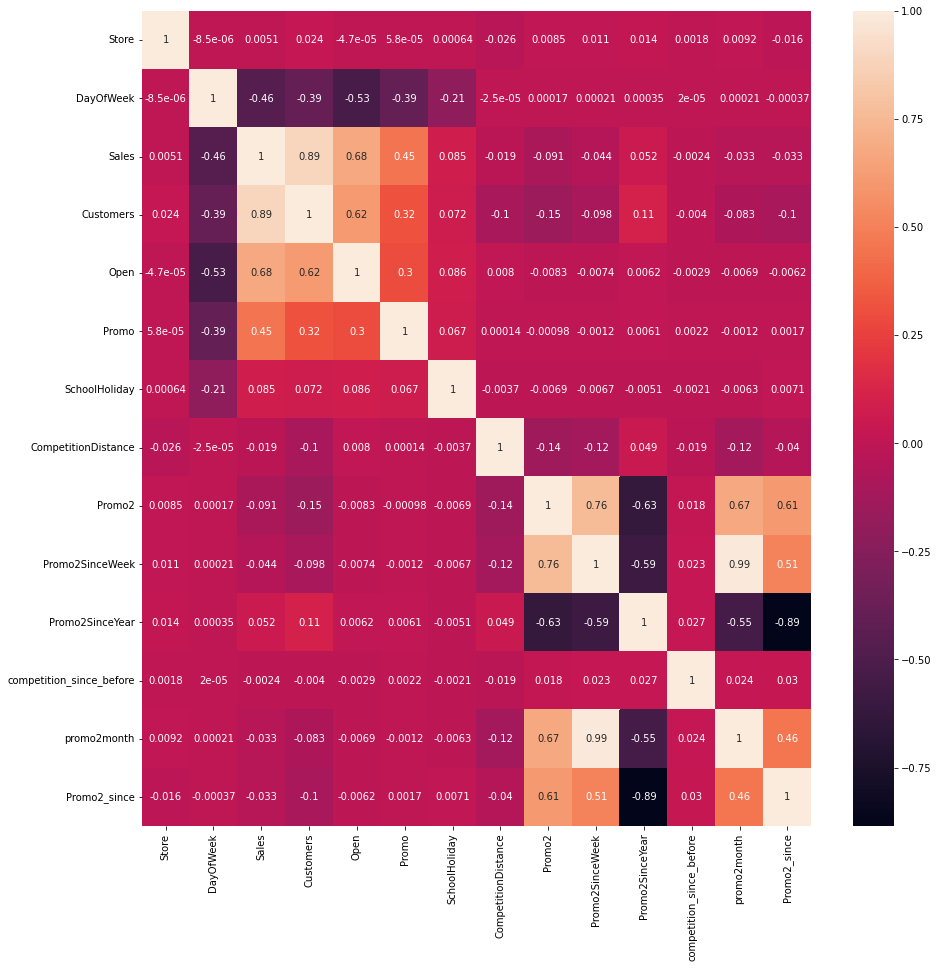

In [ ]:
#for correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(),annot=True)

In [ ]:
del final_df['Promo2_since_date']
del final_df['Promo2SinceWeek']
del final_df['Promo2SinceYear']
del final_df['promo2month']

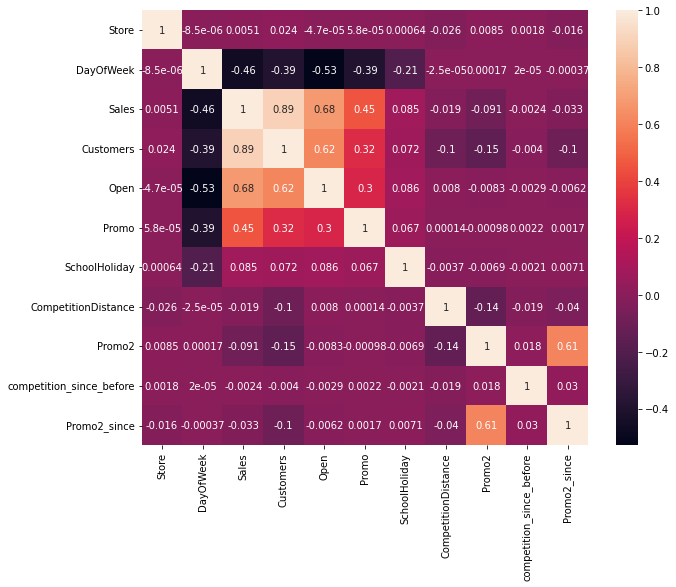

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(),annot=True)

Day of week v/s sales

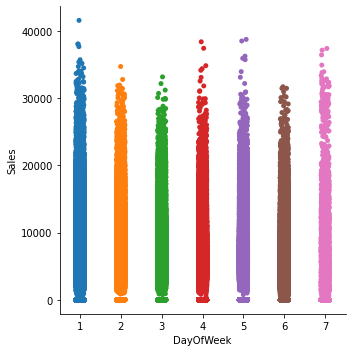

In [ ]:
#catplot
sns.catplot(data=final_df,x='DayOfWeek',y='Sales')

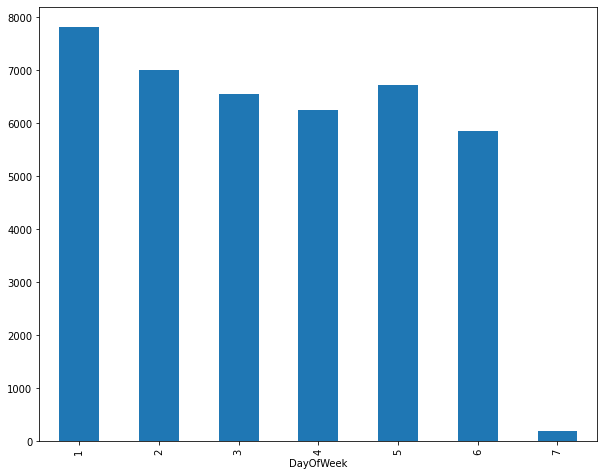

In [ ]:
#barplot
bplt1=final_df.groupby(['DayOfWeek'])['Sales'].mean().plot.bar(figsize=(10,8))

*sales varying in between 6000 to 8000 with respect to week days

#####**open v/s sales**

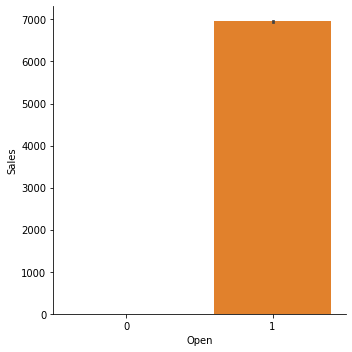

In [ ]:
sns.catplot(data=final_df,x='Open',y='Sales',kind='bar')

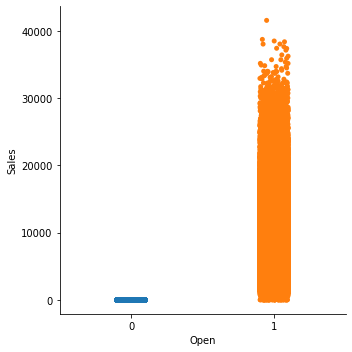

In [ ]:
sns.catplot(data=final_df,x='Open',y='Sales')

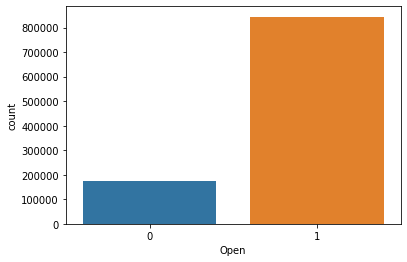

In [ ]:
#df=sns.load_dataset('final_df')
sns.countplot(x=final_df['Open'])

droping data points of shopes which are not open

1.   why beacuse sales will be zero





In [ ]:
#droping rows with data of value 'Open'=0
final_df=final_df[final_df['Open']!=0]
del final_df['Open']

## **visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


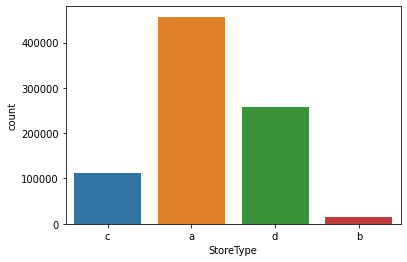

In [ ]:
ax = sns.countplot(final_df['StoreType'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


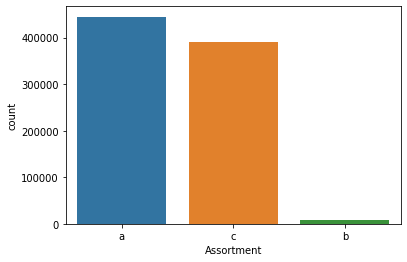

In [ ]:
ax = sns.countplot(final_df['Assortment'])

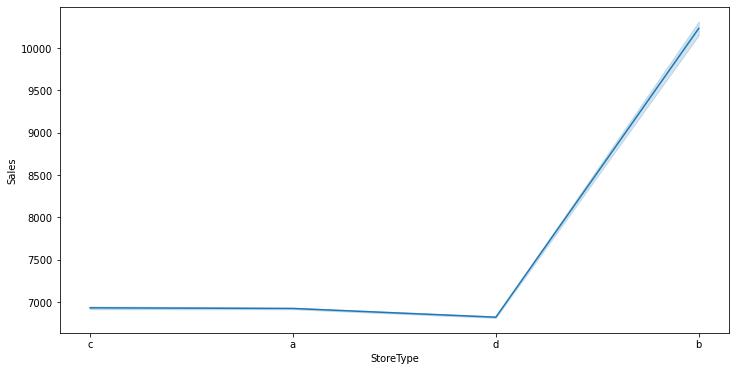

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='StoreType',y='Sales',data=final_df)

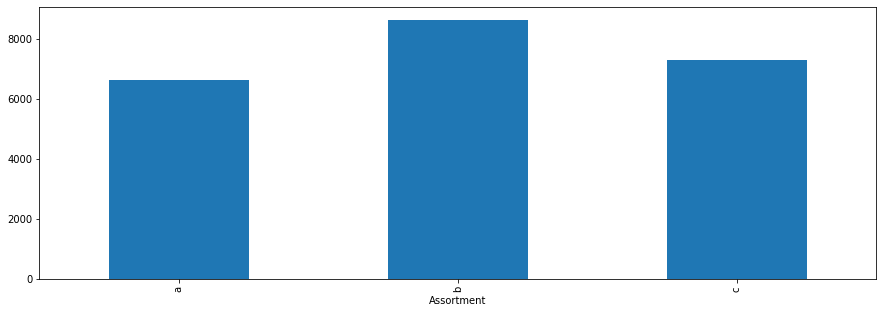

In [ ]:
bplt2=final_df.groupby(['Assortment'])['Sales'].mean().plot.bar(figsize=(15,5))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


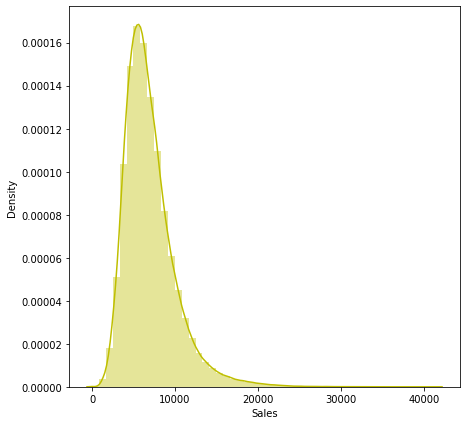

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(final_df['Sales'],color="y")

In [ ]:
final_df.Sales.describe()

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(final_df['Sales']),color='y')

In [ ]:
final_df.Sales.describe()

In [ ]:
numeric_features = final_df.describe().columns
numeric_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'competition_since_before',
       'Promo2_since', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Assortment_b', 'Assortment_c', 'StoreType_b', 'StoreType_c',
       'StoreType_d'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


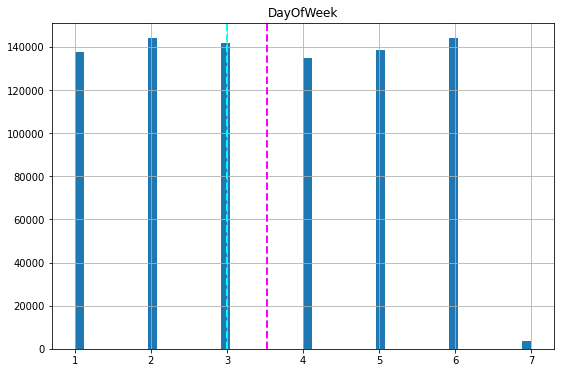

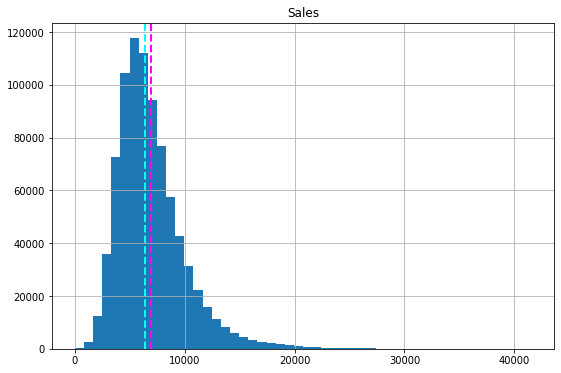

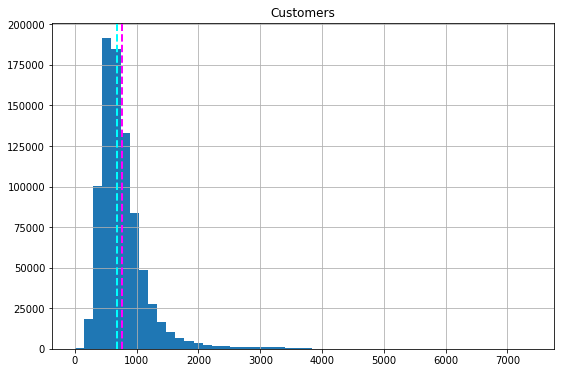

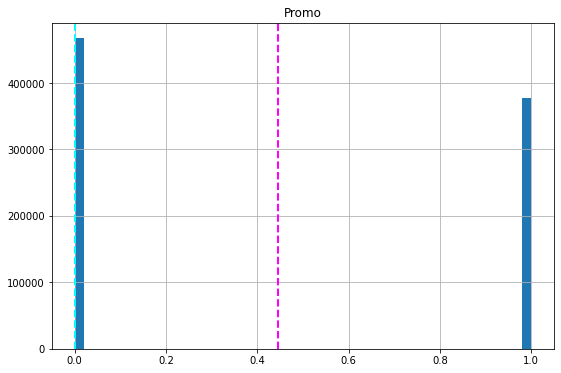

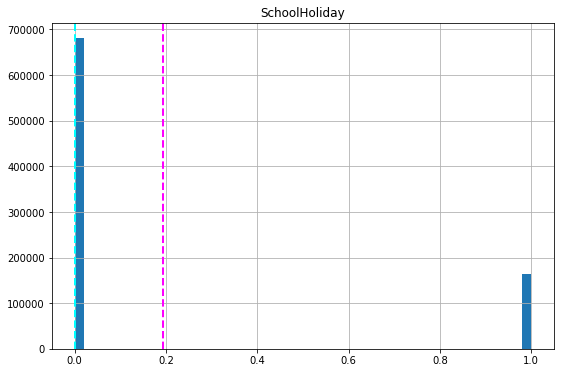

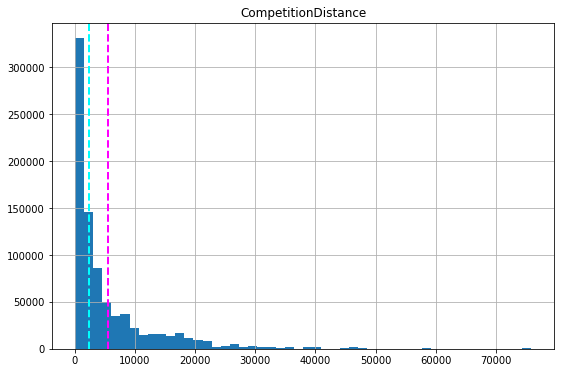

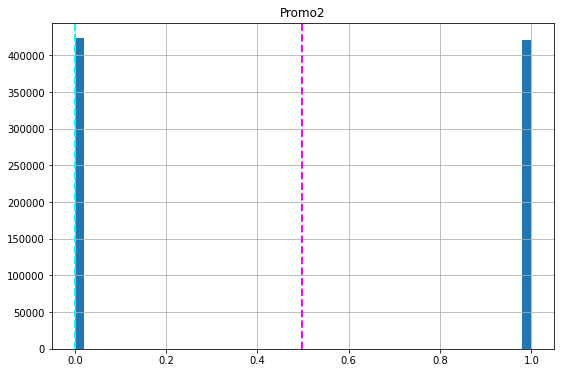

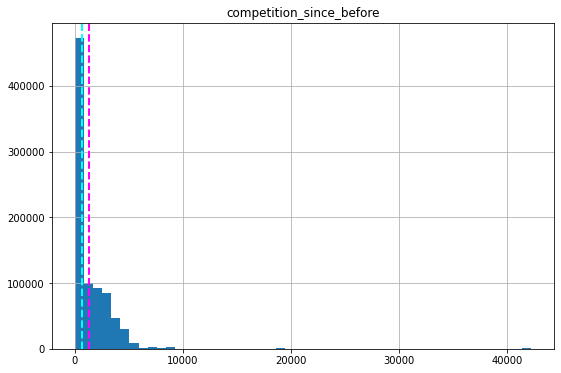

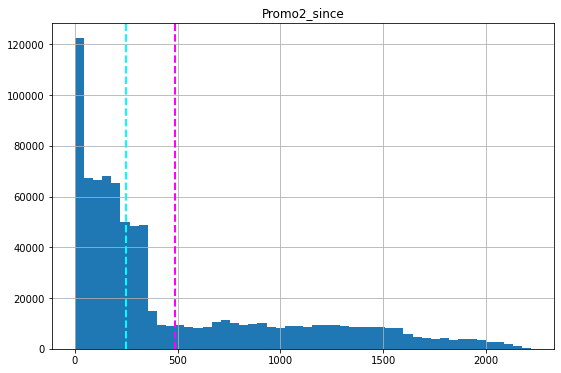

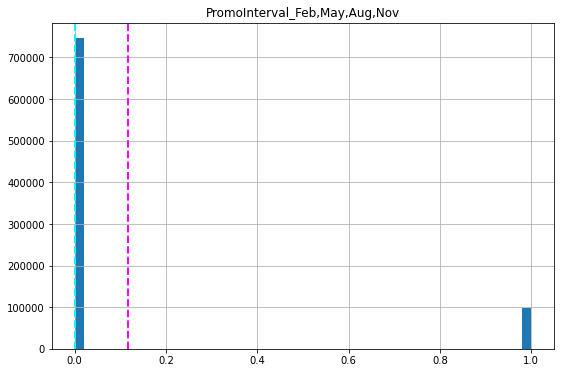

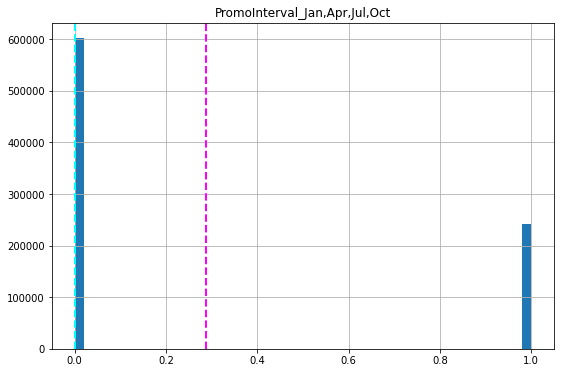

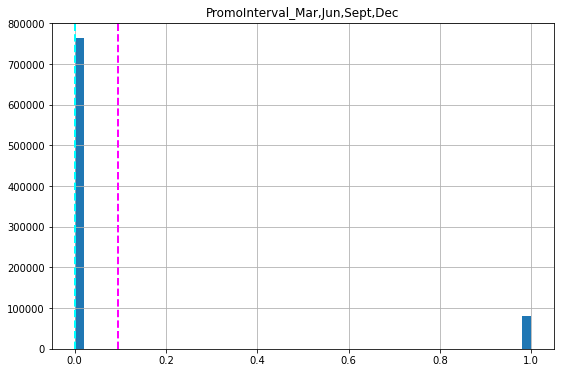

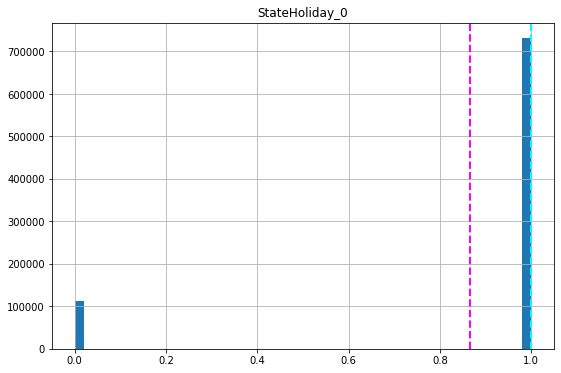

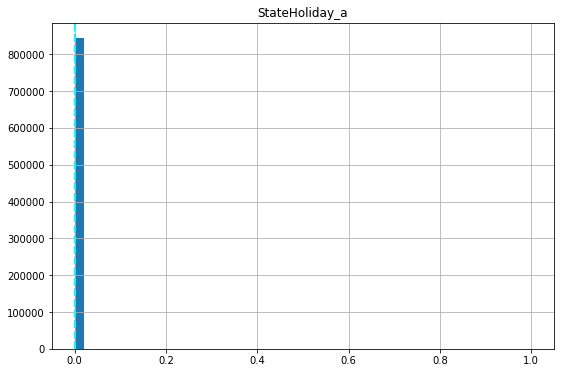

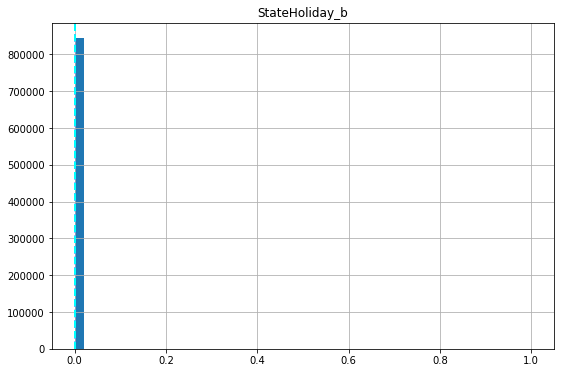

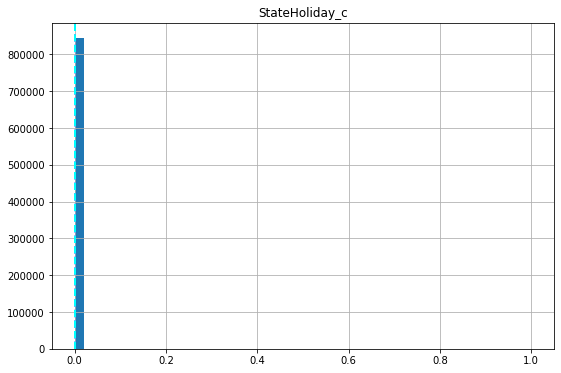

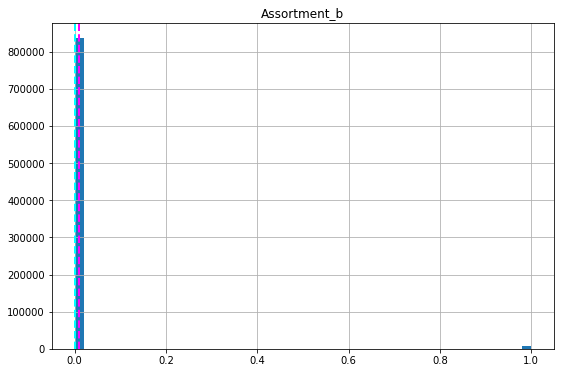

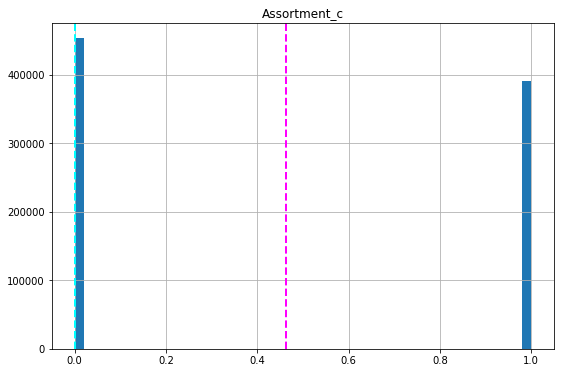

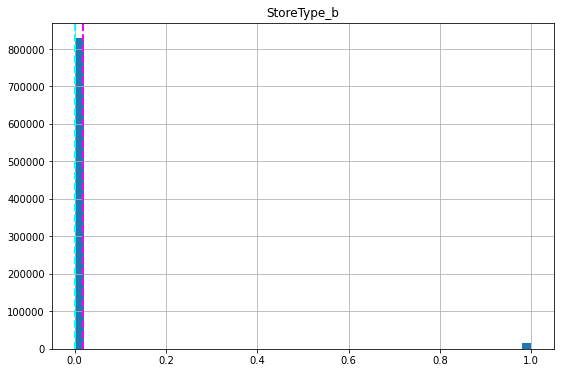

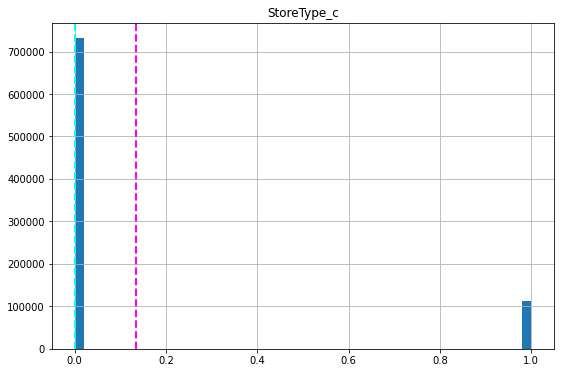

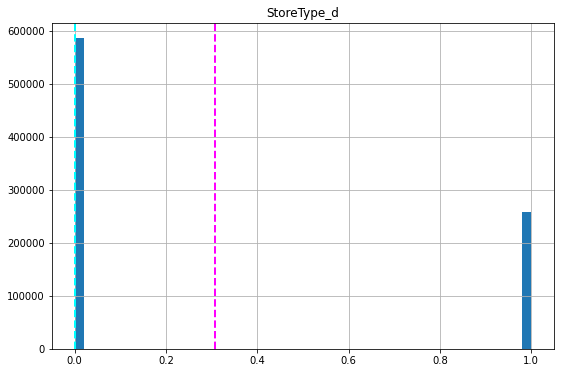

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature =np.log(final_df[col])
    feature.hist(bins=50, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

**one hot encoding**

In [ ]:
final_df = pd.get_dummies(columns = ['PromoInterval','StateHoliday','Assortment','StoreType',], data = final_df, drop_first = True)

In [ ]:
del final_df['Date']

In [ ]:
dependent_variable="Sales"

In [ ]:
independent_variables = list(set(final_df.columns.tolist())-{dependent_variable})

In [ ]:
independent_variables

In [ ]:
x=final_df[independent_variables].values

In [ ]:
y=final_df[dependent_variable].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#For normalization, we utilize the min-max scaler from scikit-learn:

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

In [ ]:
#To standardize a feature, we use the standard scaler:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_std = scaler.transform(X)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
r2_score(y_pred,y_test)

0.7870960740982524

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,competition_since_before,Promo2_since,...,"PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d
0,1,5,5263,555,1,1,1270.0,0,2524.0,211.0,...,0,1,0,0,0,0,0,0,1,0
1,1,4,5020,546,1,1,1270.0,0,2523.0,210.0,...,0,1,0,0,0,0,0,0,1,0
2,1,3,4782,523,1,1,1270.0,0,2522.0,209.0,...,0,1,0,0,0,0,0,0,1,0
3,1,2,5011,560,1,1,1270.0,0,2521.0,208.0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,6102,612,1,1,1270.0,0,2520.0,207.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,6905,471,1,1,5350.0,1,0.0,251.0,...,1,1,0,0,0,0,1,0,0,1
1017204,1115,6,4771,339,0,1,5350.0,1,0.0,249.0,...,1,1,0,0,0,0,1,0,0,1
1017205,1115,5,4540,326,0,1,5350.0,1,0.0,248.0,...,1,1,0,0,0,0,1,0,0,1
1017206,1115,4,4297,300,0,1,5350.0,1,0.0,247.0,...,1,1,0,0,0,0,1,0,0,1


***onehot encoding***

In [ ]:
#making dummies for chatagorical columns
store_df=pd.get_dummies(store_df,columns=['StoreType','Assortment','PromoInterval'])

In [ ]:
rossmann_df=pd.get_dummies(rossmann_df,columns=['StateHoliday'])

In [ ]:
final_df.drop('PromoInterval_0',axis=1,inplace=True)

In [ ]:
'''#creating bar plot of promo intervel with averg. sales
ax=final_df.groupby(['PromoInterval'])['Sales'].sum().plot.bar(figsize=(15,5),fontsize=15)

#giving tittle
ax.set_title('average sales versus promotion intervals',fontsize=15)'''




In [ ]:
#taking difference of date and competition since date and making a single column with competition starts before how many days


Here we have promo since week and year.
we have to convert it into a date format 

Here week represents number of week in a calender year so, we have to convert it into month and day

In [ ]:
plt.scatterplot